# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Dataset

In [5]:
df = pd.read_csv('bank-full.csv', sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Checking the data

In [53]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [55]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [31]:
df.shape

(45211, 17)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [59]:
df.sample()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
42576,32,management,single,tertiary,no,718,yes,no,cellular,29,dec,155,1,197,1,success,yes


In [61]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [63]:
df.duplicated().sum()

0

## Visualizations

### Correlation Matrix

In [14]:
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [16]:
num_df = df.select_dtypes(include=('int64'))
num_df

,age,balance,day,duration,campaign,pdays,previous,y
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0
45207,71,1729,17,456,2,-1,0,0
45208,72,5715,17,1127,5,184,3,0
45209,57,668,17,508,4,-1,0,0


In [18]:
corr_matrix = num_df.corr()

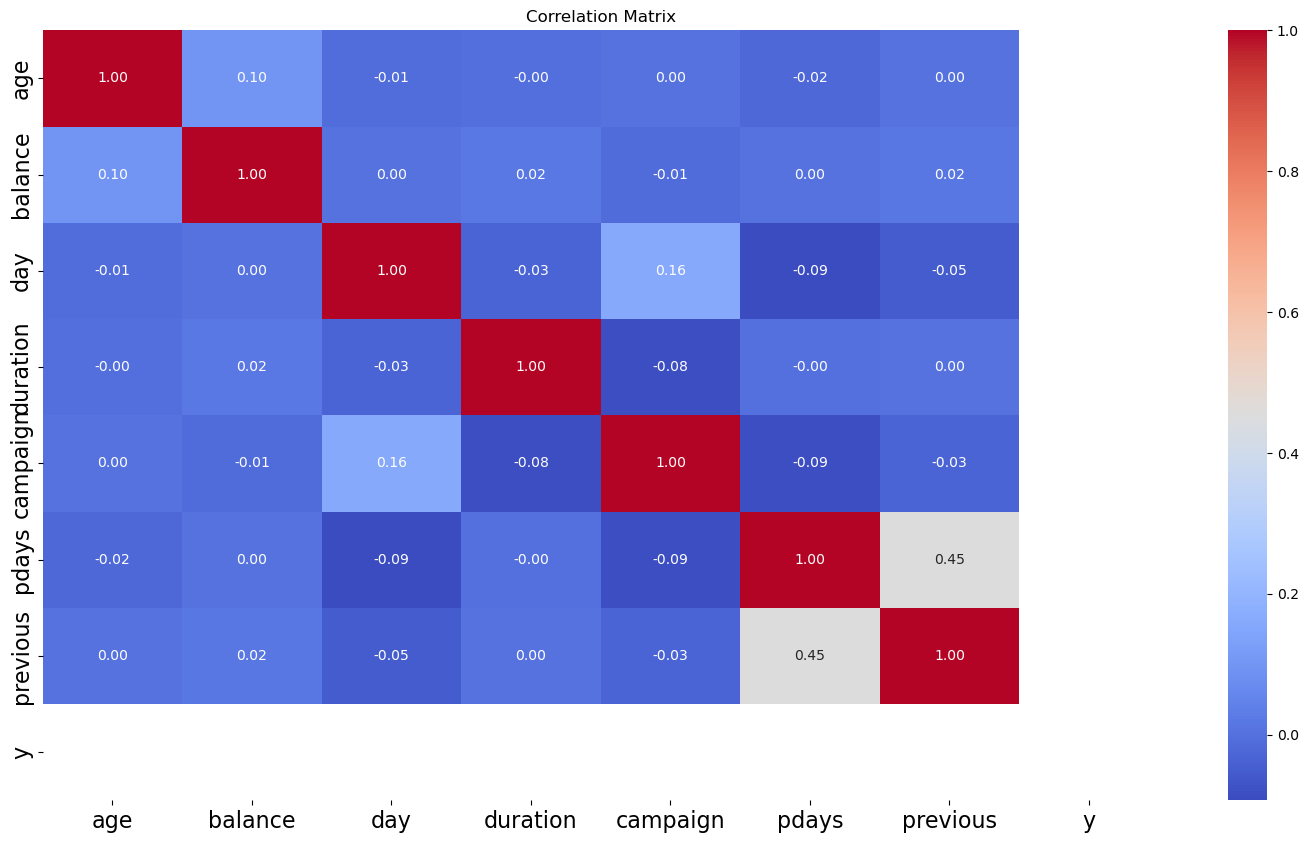

In [26]:
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Examine The Impact Of Each Variables Separately Against Dependant Variable Y

### 1. Age

In [32]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [34]:
df['age'].value_counts()

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64

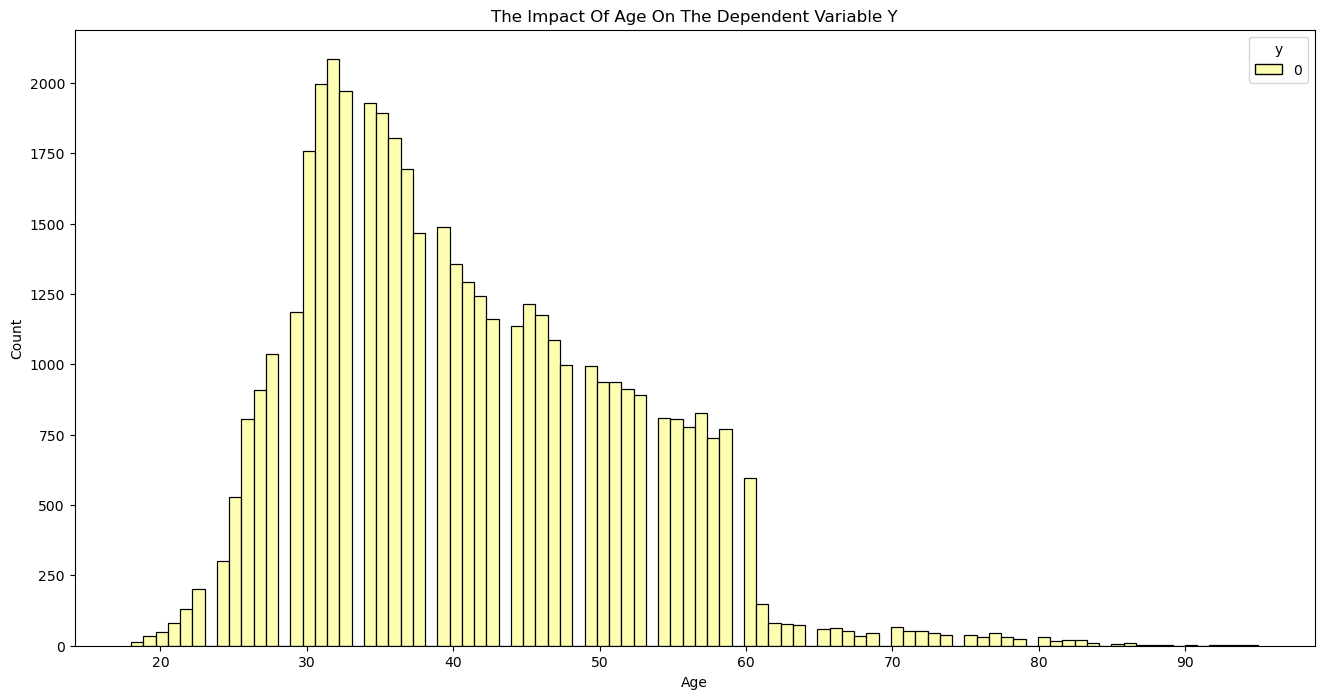

In [56]:
plt.figure(figsize=(16, 8))
sns.histplot(data=df, x='age', hue='y', multiple='stack', palette='terrain')
plt.title('The Impact Of Age On The Dependent Variable Y')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 2. Job

In [44]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [46]:
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

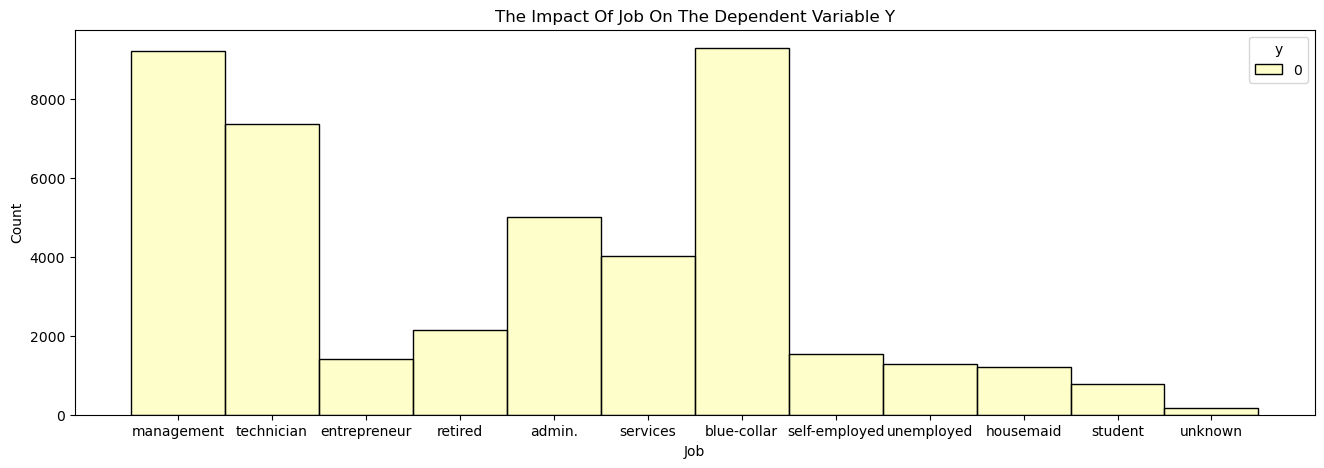

In [89]:
plt.figure(figsize=(16, 5))
sns.histplot(data=df, x='job', hue='y', palette='terrain')
plt.title('The Impact Of Job On The Dependent Variable Y')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

### 3. Marital

In [59]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [61]:
df['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

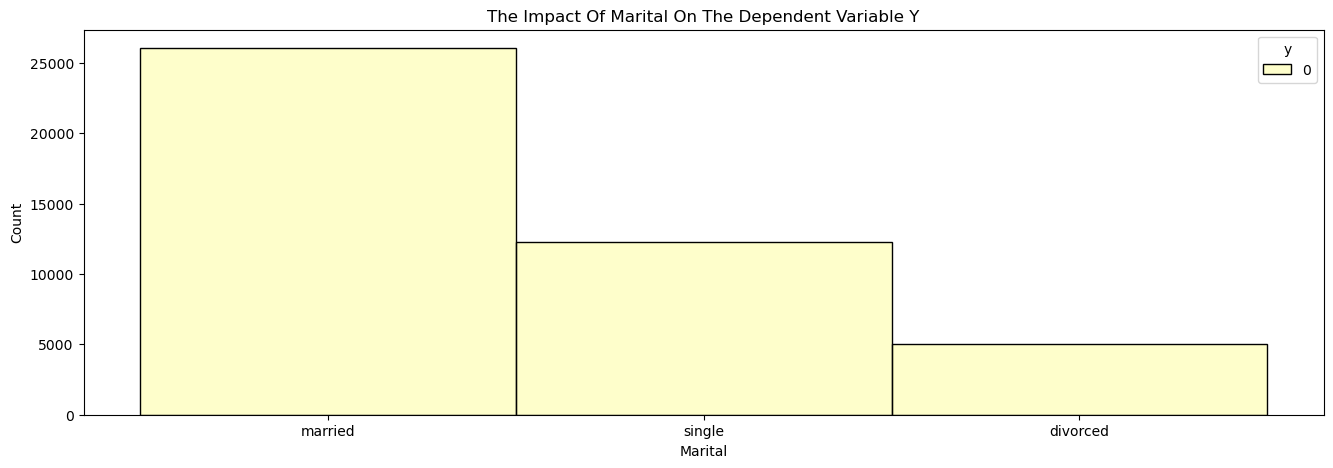

In [87]:
plt.figure(figsize=(16, 5))
sns.histplot(data=df, x='marital', hue='y', palette='terrain')
plt.title('The Impact Of Marital On The Dependent Variable Y')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.show()

### 4. Education

In [67]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [71]:
df = df[df['education'] != 'unknown']
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [69]:
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

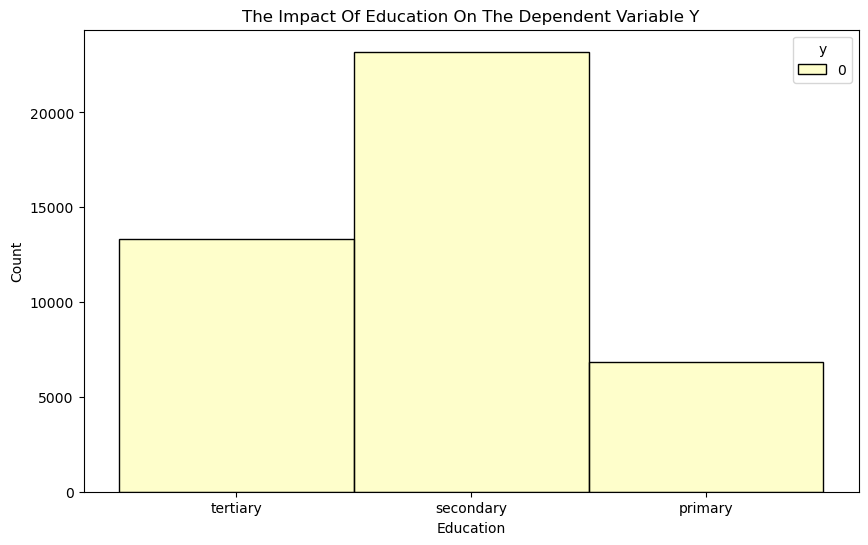

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='education', hue='y', palette='terrain')
plt.title('The Impact Of Education On The Dependent Variable Y')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

### 5. Default

In [77]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [79]:
df['default'].value_counts()

default
no     42571
yes      783
Name: count, dtype: int64

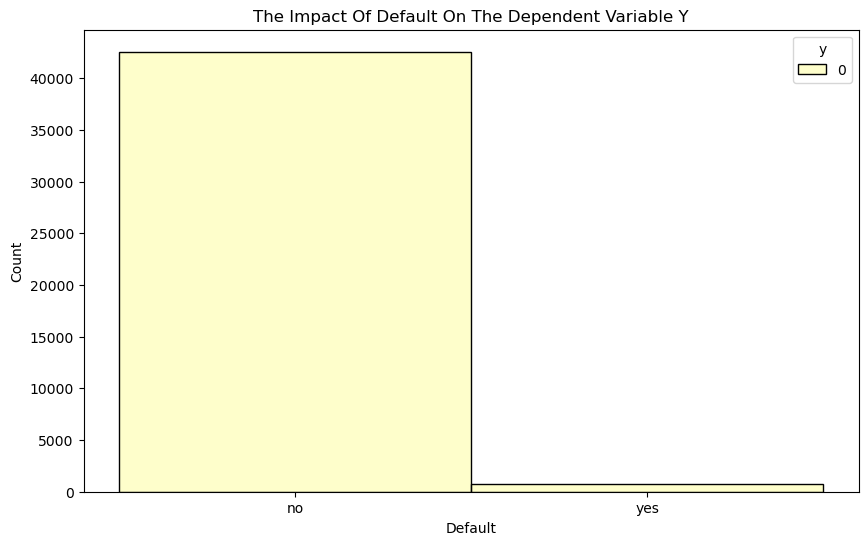

In [91]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='default', hue='y', palette='terrain')
plt.title('The Impact Of Default On The Dependent Variable Y')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

### 6. Housing

In [95]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [97]:
df['housing'].value_counts()

housing
yes    24310
no     19044
Name: count, dtype: int64

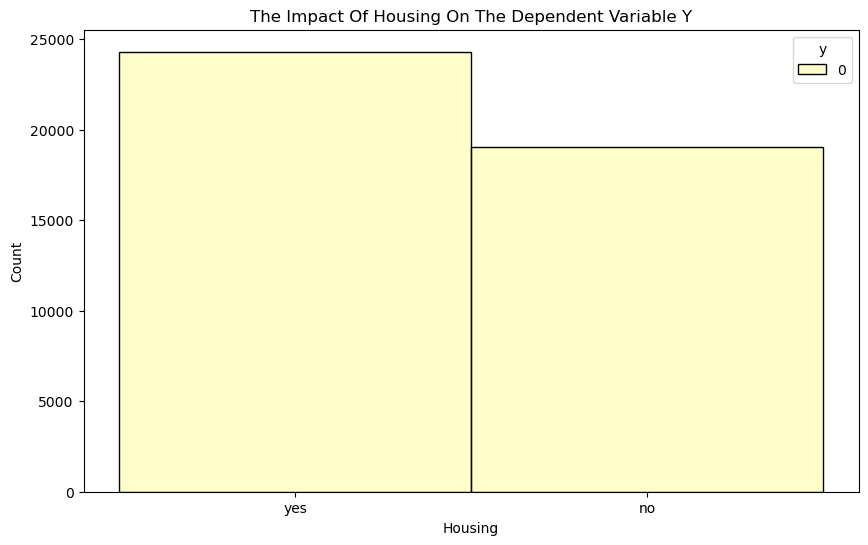

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='housing', hue='y', palette='terrain')
plt.title('The Impact Of Housing On The Dependent Variable Y')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.show()

### 7. Loan

In [103]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [105]:
df['loan'].value_counts()

loan
no     36243
yes     7111
Name: count, dtype: int64

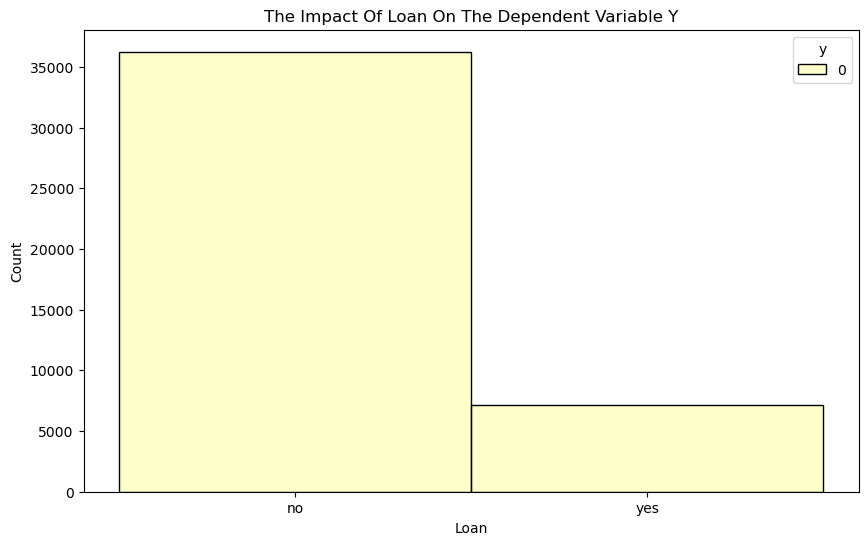

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='loan', hue='y', palette='terrain')
plt.title('The Impact Of Loan On The Dependent Variable Y')
plt.xlabel('Loan')
plt.ylabel('Count')
plt.show()

### 8. Contact

In [111]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [113]:
df['contact'].value_counts()

contact
cellular     28295
unknown      12343
telephone     2716
Name: count, dtype: int64

In [115]:
# code to distribute 'unknown' category's values proportionally between cellular and telephone based on their current counts needs to be created into new values

In [127]:
contact_counts = df['contact'].value_counts()
contact_counts

contact
cellular     28295
unknown      12343
telephone     2716
Name: count, dtype: int64

In [129]:
unknown_count = contact_counts ['unknown']
cellular_count = contact_counts ['cellular']
telephone_count = contact_counts ['telephone']

In [131]:
total = cellular_count + telephone_count
total

31011

In [133]:
cellular_ratio = cellular_count / total
telephone_ratio = telephone_count / total

In [135]:
cellular_add = int(unknown_count * cellular_ratio)
telephone_add = int(unknown_count * telephone_ratio)

In [139]:
df.loc[df['contact'] == 'unknown', 'contact'] = 'cellular'
df.loc[df.index[df['contact'] == 'cellular'][:telephone_add], 'contact'] = 'telephone'

In [141]:
new_contact_count = df['contact'].value_counts()
new_contact_count

contact
cellular     38476
telephone     4878
Name: count, dtype: int64

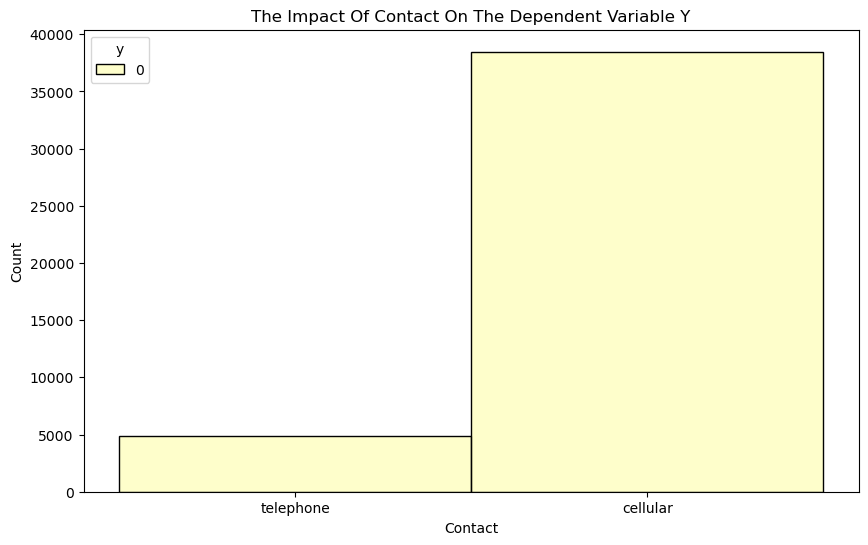

In [143]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='contact', hue='y', palette='terrain')
plt.title('The Impact Of Contact On The Dependent Variable Y')
plt.xlabel('Contact')
plt.ylabel('Count')
plt.show()

### 9. Month

In [147]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [149]:
df['month'].value_counts()

month
may    13210
jul     6621
aug     6070
jun     5026
nov     3851
apr     2822
feb     2543
jan     1327
oct      696
sep      537
mar      451
dec      200
Name: count, dtype: int64

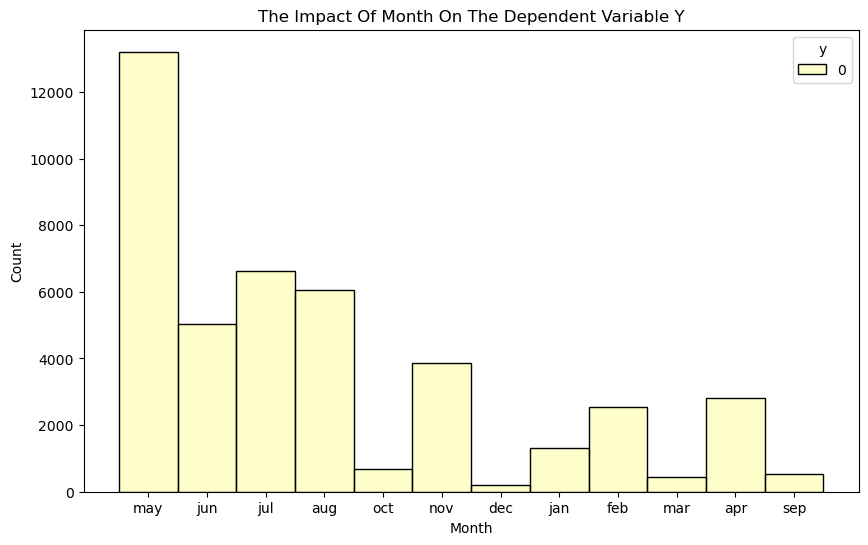

In [151]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='month', hue='y', palette='terrain')
plt.title('The Impact Of Month On The Dependent Variable Y')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

### 10. Duration

In [155]:
df['duration'].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

In [157]:
df['duration'].value_counts()

duration
124     178
90      174
89      173
114     172
136     170
       ... 
1327      1
1331      1
1608      1
1833      1
1556      1
Name: count, Length: 1559, dtype: int64

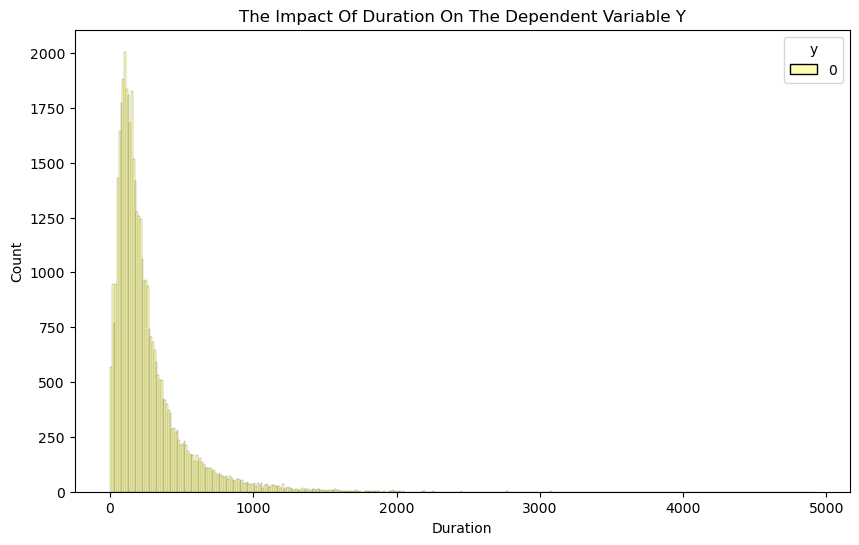

In [161]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='duration', hue='y', multiple='stack', palette='terrain')
plt.title('The Impact Of Duration On The Dependent Variable Y')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

### 11. Pdays

In [165]:
df['pdays'].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 244, 239, 245, 204, 231, 238,
       258, 230, 265,  71, 223, 246, 250, 266, 205, 240, 261, 259, 241,
       260, 234, 226, 251, 225, 161, 237, 262, 248, 254, 255, 220, 227,
       224, 206, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [167]:
df['pdays'].value_counts()

pdays
-1      35420
 182      152
 92       138
 183      120
 91       118
        ...  
 687        1
 551        1
 670        1
 32         1
 530        1
Name: count, Length: 557, dtype: int64

In [169]:
df['pdays'].describe()

count    43354.000000
mean        40.340960
std        100.331955
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

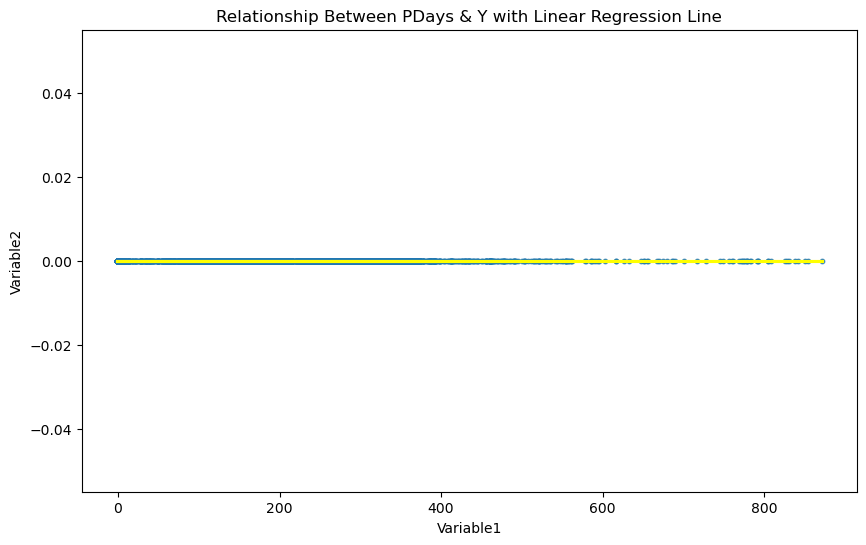

In [171]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df['pdays'], y=df['y'], scatter_kws={'s': 10}, line_kws={'color': 'yellow'})
plt.title('Relationship Between PDays & Y with Linear Regression Line')
plt.xlabel('Variable1')
plt.ylabel('Variable2')
plt.show()

### 12. Poutcome

In [175]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [177]:
df['poutcome'] = df['poutcome'].replace('unknown', 'other')
df['poutcome']

0          other
1          other
2          other
5          other
6          other
          ...   
45206      other
45207      other
45208    success
45209      other
45210      other
Name: poutcome, Length: 43354, dtype: object

In [179]:
df['poutcome'].value_counts()

poutcome
other      37200
failure     4724
success     1430
Name: count, dtype: int64

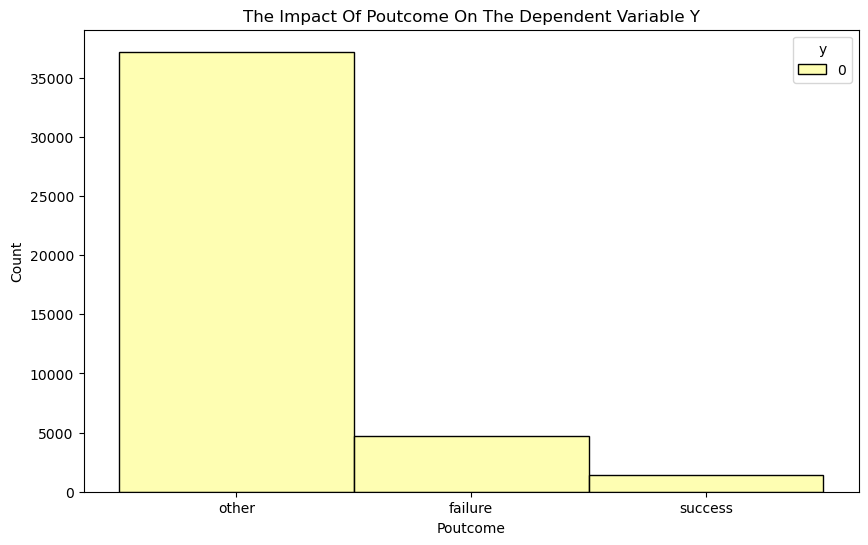

In [181]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='poutcome', hue='y', multiple='stack', palette='terrain')
plt.title('The Impact Of Poutcome On The Dependent Variable Y')
plt.xlabel('Poutcome')
plt.ylabel('Count')
plt.show()

### 13. Variable Y

In [190]:
df['y'].unique()

array([0], dtype=int64)

In [192]:
y_counts = df['y'].value_counts()
y_counts

y
0    43354
Name: count, dtype: int64

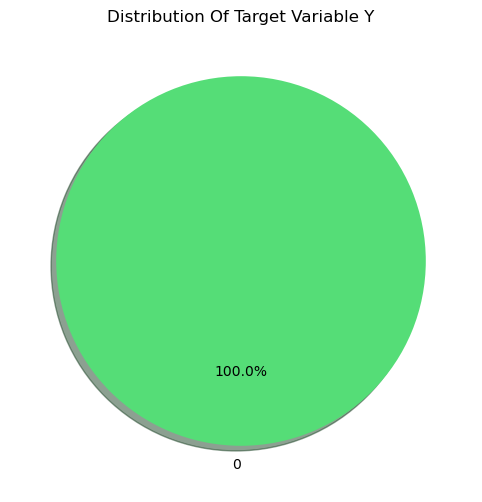

In [198]:
plt.figure(figsize=(8, 6))
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%', colors=sns.color_palette('terrain', 2), startangle=90, shadow=True)
plt.title('Distribution Of Target Variable Y')
plt.show()

## Predective Modeling

### 1. Label Encoder

In [203]:
encoder = LabelEncoder()

In [205]:
label_mappings = {}

In [207]:
for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f'Column: {col}')
    for label, code in mapping.items():
        print('f{code} -> {label}')
        print()

Column: job
f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

Column: marital
f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

Column: education
f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

Column: default
f{code} -> {label}

f{code} -> {label}

Column: housing
f{code} -> {label}

f{code} -> {label}

Column: loan
f{code} -> {label}

f{code} -> {label}

Column: contact
f{code} -> {label}

f{code} -> {label}

Column: month
f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

f{code} -> {label}

Column: poutcome
f{code} -> {label}

f{code} -> {label}

f{code} -> {label}



### 2. Train Test Split

In [213]:
X = df.drop('y', axis=1)
y = df['y']

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(34683, 16) (8671, 16)


### 3. Random Forest Classifier

In [219]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [221]:
y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy

1.0

### 4. Standard Scaler

In [237]:
scaler = StandardScaler()

In [239]:
scaler.fit(X_train)

StandardScaler()